<a href="https://colab.research.google.com/github/MYTHILY7/Data-Analysis-and-Visualization-/blob/main/lung_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cancer=pd.read_csv('/content/survey lung cancer.csv')

In [ ]:
cancer.shape

(309, 16)

In [ ]:
cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
cancer.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
cancer.describe

<bound method NDFrame.describe of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1  

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = preprocessing.LabelEncoder()
cancer['GENDER'] = le.fit_transform(cancer['GENDER'])
cancer['LUNG_CANCER'] = le.fit_transform(cancer['LUNG_CANCER'])
cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
x = cancer.drop(['AGE','LUNG_CANCER'],axis=1)
y = cancer['LUNG_CANCER']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
pred2 = rf.predict(x_test)
print('-----------------RANDOM FOREST----------------')
print(classification_report(pred2,y_test))
print(confusion_matrix(pred2,y_test))
print('----------------------------------------------')

-----------------RANDOM FOREST----------------
              precision    recall  f1-score   support

           0       0.59      0.71      0.65        14
           1       0.96      0.94      0.95       110

    accuracy                           0.91       124
   macro avg       0.78      0.83      0.80       124
weighted avg       0.92      0.91      0.91       124

[[ 10   4]
 [  7 103]]
----------------------------------------------


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print('-----------------DECISION TREE----------------')
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print('----------------------------------------------')

-----------------DECISION TREE----------------
              precision    recall  f1-score   support

           0       0.59      0.94      0.73        17
           1       0.99      0.90      0.94       107

    accuracy                           0.90       124
   macro avg       0.79      0.92      0.83       124
weighted avg       0.94      0.90      0.91       124

[[16  1]
 [11 96]]
----------------------------------------------


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
'''arr = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    arr.append(np.mean(pred != y_test))
plt.figure(figsize=(12,5))
plt.plot(range(1,40),arr,color = 'red',linestyle = 'dashed',marker = 'o',markerfacecolor = 'blue')
plt.show()'''
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('-----------------K NEAREST NEIGHBOURS------------------')
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print('-------------------------------------------------------')

-----------------K NEAREST NEIGHBOURS------------------
              precision    recall  f1-score   support

           0       0.70      0.41      0.52        17
           1       0.91      0.97      0.94       107

    accuracy                           0.90       124
   macro avg       0.81      0.69      0.73       124
weighted avg       0.88      0.90      0.88       124

[[  7  10]
 [  3 104]]
-------------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
log = LogisticRegression()
log.fit(x_train,y_train)
pre = log.predict(x_test)
print('-----------------LOGESTIC REGRESSION-------------------')
print(classification_report(y_test,pre))
print(confusion_matrix(y_test,pre))
print('-------------------------------------------------------')

-----------------LOGESTIC REGRESSION-------------------
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        17
           1       0.95      0.95      0.95       107

    accuracy                           0.92       124
   macro avg       0.83      0.83      0.83       124
weighted avg       0.92      0.92      0.92       124

[[ 12   5]
 [  5 102]]
-------------------------------------------------------


In [ ]:
plot1 = SVC()
plot1.fit(x_train,y_train)
pred1 = plot1.predict(x_test)
print('-----------------SUPPORT VECTOR MACHINE----------------')
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print('-------------------------------------------------------')


-----------------SUPPORT VECTOR MACHINE----------------
              precision    recall  f1-score   support

           0       0.67      0.47      0.55        17
           1       0.92      0.96      0.94       107

    accuracy                           0.90       124
   macro avg       0.79      0.72      0.75       124
weighted avg       0.88      0.90      0.89       124

[[  8   9]
 [  4 103]]
-------------------------------------------------------


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print('------------------NAIVE BAYES---------------------')
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('--------------------------------------------------')

------------------NAIVE BAYES---------------------
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.95      0.94      0.95       107

    accuracy                           0.91       124
   macro avg       0.81      0.82      0.82       124
weighted avg       0.91      0.91      0.91       124

[[ 12   5]
 [  6 101]]
--------------------------------------------------


In [ ]:
log = LogisticRegression()
log.fit(x_train,y_train)
y_proba = log.predict(x_test)
print('-----------------LOGESTIC REGRESSION-------------------')
print(classification_report(y_test,y_proba))
print(confusion_matrix(y_test,y_proba))
print('-------------------------------------------------------')
#support vector machine
conf=confusion_matrix(y_test,y_proba)

-----------------LOGESTIC REGRESSION-------------------
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        17
           1       0.95      0.95      0.95       107

    accuracy                           0.92       124
   macro avg       0.83      0.83      0.83       124
weighted avg       0.92      0.92      0.92       124

[[ 12   5]
 [  5 102]]
-------------------------------------------------------


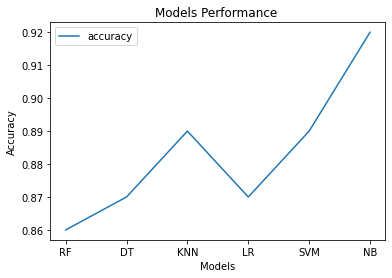

In [ ]:
import matplotlib.pyplot as plt

x= ['RF','DT','KNN','LR','SVM','NB'  ]
y = [0.86,0.87,0.89,0.87,0.89,0.92]

plt.plot(x, y, label= "accuracy" )
plt.plot()

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models Performance ")
plt.legend()
plt.show()

In [ ]:
import itertools

In [ ]:
TP = true_pos = 75
TN = true_neg = 142
FP = false_pos = 3
FN = false_neg = 8

In [ ]:
results = {}
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.952


In [ ]:
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.904


In [ ]:
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  0.979


In [ ]:
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.962


In [ ]:
metric = "FPR"
results[metric] = FP / (FP + TN)
print(f"{metric} is {results[metric]: .3f}")

FPR is  0.021


In [ ]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.932


In [ ]:
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC is  0.895


In [ ]:
FNR= FN/(FN+TP)
print(FNR)

0.0963855421686747


Text(0.5, 15.0, 'Predicted label')

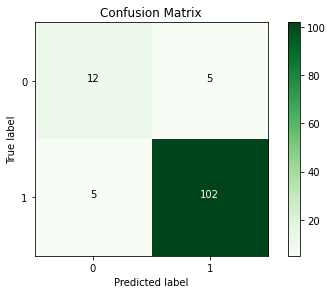

In [ ]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn import metrics
#Now, let's see how these curve's are similiar to the ROC curve with scikit's implementation.
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_proba)

In [ ]:
plr=TPRs/FPRs
print(plr)

[      nan 3.2411215 1.       ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


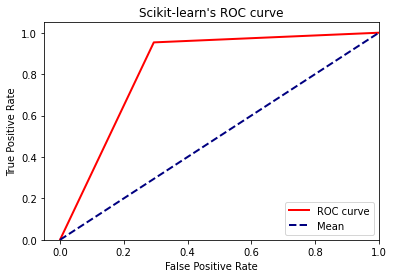

In [ ]:
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()